In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)

In [3]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
from pandas.plotting import autocorrelation_plot

In [5]:
data = read_csv("E:/GitHub/SDGP/kottawa.csv",header=0, parse_dates=[0], index_col=1)
series = data.drop(['Id','IR','DFKJ', 'DFNJ', 'RoadSize', 'CPI','DollarR','GDPUsd'],axis=1)

In [6]:
series.head()

,AvgPrice
Year,
2020,47.5
2020,42.5
2020,37.5
2020,37.5
2020,32.5


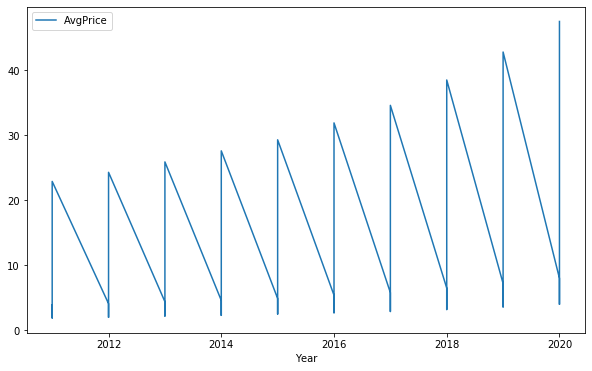

In [13]:
series.plot()

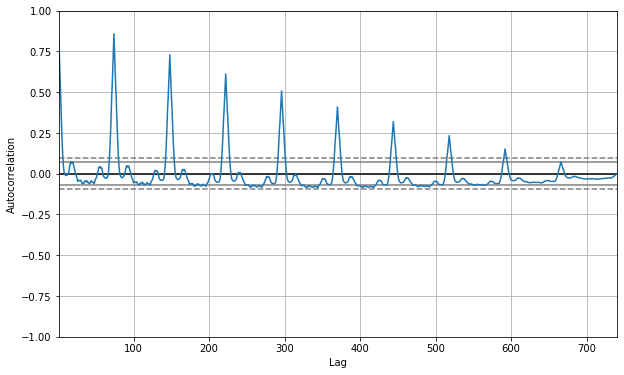

In [8]:
autocorrelation_plot(series)
pyplot.show()
#p value can be 590

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

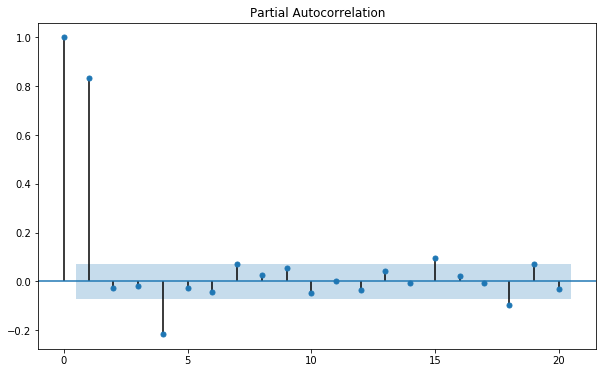

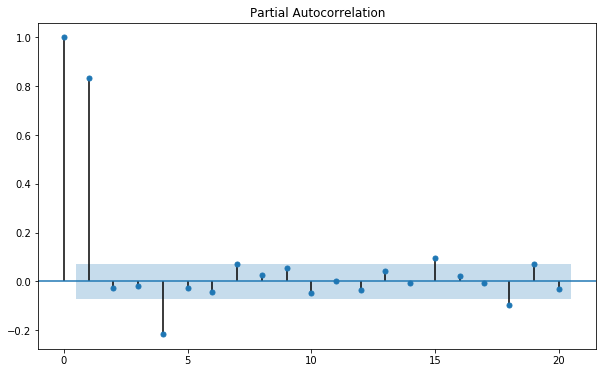

In [11]:
plot_pacf(series, lags =20)

In [38]:
model = ARIMA(series, order=(5,1,3))

C:\Users\kevin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\kevin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [39]:
model_fit = model.fit()

In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.AvgPrice   No. Observations:                  739
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -1895.651
Method:                       css-mle   S.D. of innovations              3.135
Date:                Wed, 15 Apr 2020   AIC                           3811.302
Time:                        01:47:49   BIC                           3857.355
Sample:                             1   HQIC                          3829.060
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0100      0.003     -3.981      0.000      -0.015      -0.005
ar.L1.D.AvgPrice     0.2978      0.153      1.941      0.052      -0.003       0.599
ar.L2.D.AvgPrice     0.7763      0.056     13.820      0.000       0.666       0.886
ar.L3.D.AvgPrice    -0.0743      0.123     -0.605      0.545      -0.315       0.166
ar.L4.D.AvgPrice    -0.1232      0.042     -2.955      0.003      -0.205      -0.041
ar.L5.D.AvgPrice    -0.1535      0.048     -3.183      0.001      -0.248      -0.059
ma.L1.D.AvgPrice    -0.4147      0.153     -2.709      0.007      -0.715      -0.115
ma.L2.D.AvgPrice    -0.8839      0.049    -18.189      0.000      -0.979      -0.789
ma.L3.D.AvgPrice     0.2987      0.131      2.286      0.022       0.043       0.555
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1432           -0.3176j            1.1865           -0.0431
AR.2            1.1432           +0.3176j            1.1865            0.0431
AR.3           -1.1941           -0.0000j            1.1941           -0.5000
AR.4           -0.9473           -1.7258j            1.9687           -0.3299
AR.5           -0.9473           +1.7258j            1.9687            0.3299
MA.1           -1.0958           +0.0000j            1.0958            0.5000
MA.2            1.0000           +0.0000j            1.0000            0.0000
MA.3            3.0552           +0.0000j            3.0552            0.0000
-----------------------------------------------------------------------------
"""

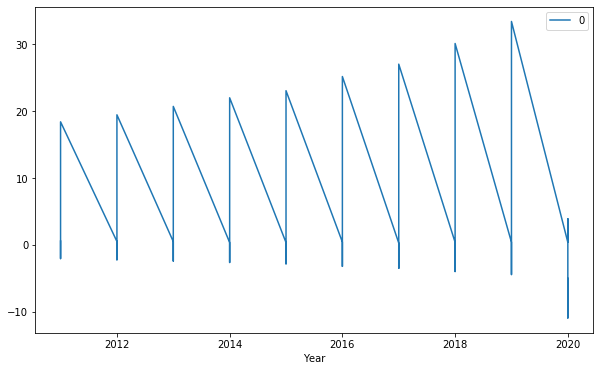

In [41]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

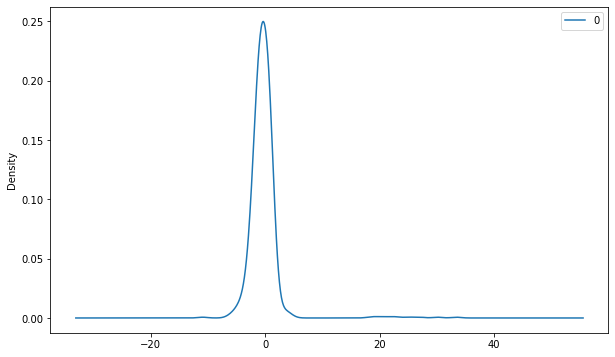

In [42]:
residuals.plot(kind='kde')

In [43]:
residuals.describe()

,0
count,739.000000
mean,-0.239088
std,3.145723
min,-10.914285
25%,-1.319573
50%,-0.472890
75%,0.464008
max,33.392318
